In [261]:
import os
import shutil
from copy import deepcopy

import torch 
import torch.nn as nn
import torch.nn.functional as F
import scipy.io
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

from matplotlib import pyplot as plt

## **Physics Informed Neural Network**
**Task 1:** Given fixed model parameters λ what can be said about the unknown hidden state u(t, x)
of the system?

**Task 2:** what are the parameters λ that best describe the observed data?

**New Learning**
1. Meshgrid creates a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. 
2. Subplots return a figure and axs to plot sub figures in the main figure
3. `scipy.io` has a function to read matlab files. `.mat` extension are files that are in the binary data container format that the MATLAB program uses.

In [20]:
DATA_PATH = "../Data/burgers_shock.mat"
data_dict = scipy.io.loadmat(DATA_PATH)
data_dict

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Sep 20 16:38:22 2017',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[-1.        ],
        [-0.99215686],
        [-0.98431373],
        [-0.97647059],
        [-0.96862745],
        [-0.96078431],
        [-0.95294118],
        [-0.94509804],
        [-0.9372549 ],
        [-0.92941176],
        [-0.92156863],
        [-0.91372549],
        [-0.90588235],
        [-0.89803922],
        [-0.89019608],
        [-0.88235294],
        [-0.8745098 ],
        [-0.86666667],
        [-0.85882353],
        [-0.85098039],
        [-0.84313725],
        [-0.83529412],
        [-0.82745098],
        [-0.81960784],
        [-0.81176471],
        [-0.80392157],
        [-0.79607843],
        [-0.78823529],
        [-0.78039216],
        [-0.77254902],
        [-0.76470588],
        [-0.75686275],
        [-0.74901961],
        [-0.74117647],
        [-0.73333333],
        [-0.7254902 ],
        [-0.71764706],
        

In [21]:
data_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x', 't', 'usol'])

In [224]:
x,t,u = data_dict['x'], data_dict['t'], data_dict['usol']
x.shape, t.shape, u.shape

((256, 1), (100, 1), (256, 100))

In [ ]:
# To plot the actual value of the functino at particular point in time over range of space
#  for t = 0.25
# make all the values other than 0.25 as 0

T = deepcopy(X)
# print(T.shape[0])
for x_c in range(T.shape[0]):
    for y_c in range(T.shape[1]):
        if T[x_c][y_c] not in (0.25, 0.5, 0.75) : T[x_c][y_c] = 0
            

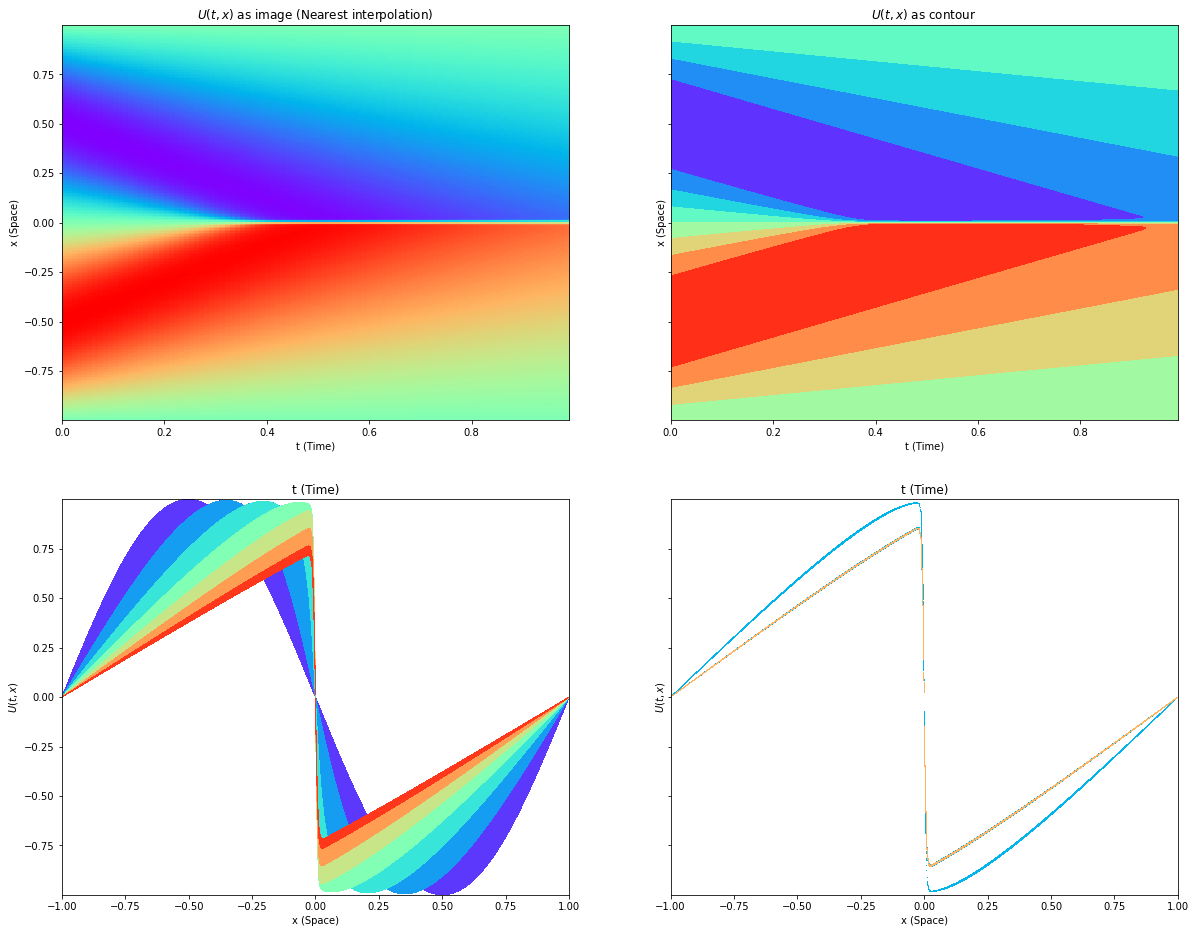

In [227]:
fig, axs = plt.subplots(2,2, sharey=True, figsize=(20,16))

X,Y = meshgrid(t, x) # grid of point

axs[0][0].imshow(u, cmap="rainbow", interpolation="nearest", extent=[t.min(), t.max(), x.min(), x.max()], origin='lower', aspect='auto')
axs[0][0].set_title("$U(t,x)$ as image (Nearest interpolation)")
axs[0][0].set_xlabel("t (Time)")
axs[0][0].set_ylabel("x (Space)")

axs[0][1].contourf(X,Y,u, cmap='rainbow')
axs[0][1].set_title("$U(t,x)$ as contour")
axs[0][1].set_xlabel("t (Time)")
axs[0][1].set_ylabel("x (Space)")

axs[1][0].contourf(Y,u,X, cmap='rainbow')
axs[1][0].set_title("t (Time)")
axs[1][0].set_ylabel("$U(t,x)$")
axs[1][0].set_xlabel("x (Space)")

axs[1][1].contourf(Y,u,T, cmap="rainbow", levels=[0.25, 0.5, 0.75])
axs[1][1].set_title("t (Time)")
axs[1][1].set_ylabel("$U(t,x)$")
axs[1][1].set_xlabel("x (Space)")


show()

In [258]:
# Combines the space and time component into a training sample
np.hstack((X.flatten()[:,None], Y.flatten()[:,None])).shape

(25600, 2)

In [252]:
X.flatten()[:, None]

array([[0.  ],
       [0.01],
       [0.02],
       ...,
       [0.97],
       [0.98],
       [0.99]])

In [251]:
Y.flatten()[:, None]

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

In [ ]:
np.hstack((X.flatten))

In [260]:
np.real(u).flatten()[:, None].shape

(25600, 1)

In [ ]:
class PhysicsNN(nn.Module):
    
    def __init__(self, ):
        
        super(PhysicsNN, self).__init__()